In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

loan_data=pd.read_csv('/Users/neiloza/Downloads/lending-club-loan-data/loan.csv',low_memory=True)


/Users/neiloza/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
entries=len(loan_data.index)
percentile=.4
loan_data_cleaned=loan_data.dropna(thresh=int(percentile*entries),axis=1)
loan_data_cleaned=loan_data_cleaned[loan_data_cleaned.loan_status!='Fully Paid']
loan_data_cleaned


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N
5,5550,5550,5550.0,36 months,15.02,192.45,C,C3,Director COE,10+ years,...,60.0,0.0,0.0,831687.0,185378.0,65900.0,203159.0,N,Cash,N
6,2000,2000,2000.0,36 months,17.97,72.28,D,D1,Account Manager,4 years,...,NaN,0.0,0.0,854.0,854.0,0.0,0.0,N,Cash,N
7,6000,6000,6000.0,36 months,13.56,203.79,C,C1,Assistant Director,10+ years,...,85.7,0.0,0.0,117242.0,91535.0,33100.0,61742.0,N,DirectPay,N
8,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Legal Assistant III,10+ years,...,60.0,0.0,0.0,57426.0,41882.0,21500.0,34626.0,N,Cash,N
9,6000,6000,6000.0,36 months,14.47,206.44,C,C2,NaN,< 1 year,...,26.3,0.0,0.0,477390.0,105911.0,98300.0,89600.0,N,Cash,N


In [3]:
columns_to_drop=['emp_title','title','pymnt_plan','zip_code','out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d','issue_d','earliest_cr_line']

In [4]:
loan_data_cleaned=loan_data_cleaned.drop(columns_to_drop,axis=1)

In [5]:
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218716 entries, 0 to 2260667
Data columns (total 84 columns):
loan_amnt                     1218716 non-null int64
funded_amnt                   1218716 non-null int64
funded_amnt_inv               1218716 non-null float64
term                          1218716 non-null object
int_rate                      1218716 non-null float64
installment                   1218716 non-null float64
grade                         1218716 non-null object
sub_grade                     1218716 non-null object
emp_length                    1126869 non-null object
home_ownership                1218716 non-null object
annual_inc                    1218712 non-null float64
verification_status           1218716 non-null object
loan_status                   1218716 non-null object
purpose                       1218716 non-null object
addr_state                    1218716 non-null object
dti                           1217255 non-null float64
delinq_2yrs         

Fully Paid                                             1041952
Current                                                 919685
Charged Off                                             261654
Late (31-120 days)                                       21118
In Grace Period                                           8920
Late (16-30 days)                                         3674
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [7]:
#loan_data_cleaned.last_pymnt_d.value_counts()

In [30]:
sample=loan_data_cleaned.sample(n=10000)
y=sample.loan_status
y=y.apply(lambda x: 0 if x=='Current'or x=='In Grace Period' else 1)
dummied_loan_data=sample.drop(['loan_status'],axis=1)
dummied_loan_data=pd.get_dummies(dummied_loan_data,drop_first=True)
X_forest=dummied_loan_data.fillna(dummied_loan_data.median())

In [31]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1580863 to 2070997
Data columns (total 84 columns):
loan_amnt                     10000 non-null int64
funded_amnt                   10000 non-null int64
funded_amnt_inv               10000 non-null float64
term                          10000 non-null object
int_rate                      10000 non-null float64
installment                   10000 non-null float64
grade                         10000 non-null object
sub_grade                     10000 non-null object
emp_length                    9262 non-null object
home_ownership                10000 non-null object
annual_inc                    10000 non-null float64
verification_status           10000 non-null object
loan_status                   10000 non-null object
purpose                       10000 non-null object
addr_state                    10000 non-null object
dti                           9988 non-null float64
delinq_2yrs                   10000 non-null float

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X_forest,y,test_size=.25,random_state=42)
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8628

In [17]:
s1=pd.DataFrame(X_forest.columns.values)
s1.columns=['column_name']
s1.loc[:,'column_importance']=rf.feature_importances_


,column_name,column_importance
0,loan_amnt,0.010947
1,funded_amnt,0.012025
2,funded_amnt_inv,0.011742
3,int_rate,0.029198
4,installment,0.015506
5,annual_inc,0.012871
6,dti,0.013845
7,delinq_2yrs,0.002938
8,inq_last_6mths,0.007364
9,mths_since_last_delinq,0.008511


In [49]:
params={'n_estimators':[100],'max_depth':[25,30,35],'max_features':[.30,.35,.40]}

In [50]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(rf,params,cv=5)
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100], 'max_depth': [25, 30, 35], 'max_features': [0.3, 0.35, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
gcv.best_score_

0.8718666666666667

In [55]:
from sklearn.metrics import precision_recall_curve as prc
rf=RandomForestClassifier(max_features=.35,n_estimators=100,max_depth=30)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)


0.8736

In [76]:
default_probabilities=rf.predict_proba(X_test)[:,1]


Text(0.5, 1.0, 'Precision Recall Curve')

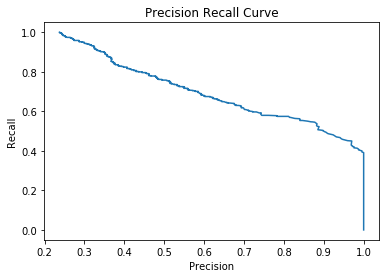

In [92]:
precision, recall, threshold=prc(y_true=y_test,probas_pred=default_probabilities)
plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')

In [90]:
from sklearn.metrics import f1_score, recall_score, precision_score,auc
print('for the Random forest Classifier,')
print('the Precision is '+str(precision_score(y_true=y_test,y_pred=rf.predict(X_test))))
print('the Recall is '+str(recall_score(y_true=y_test,y_pred=rf.predict(X_test))))
print('the f1 score is '+str(f1_score(y_test,rf.predict(X_test))))


for the Random forest Classifier,
the Precision is 0.8465608465608465
the Recall is 0.5536332179930796
the f1 score is 0.6694560669456067


In [93]:
print('the auc is '+str(auc(precision,recall)))

ValueError: x is neither increasing nor decreasing : [0.23727422 0.23696099 0.23705834 ... 1.         1.         1.        ].

In [ ]:
from sklearn.linear_model import LogisticRegression
